# Formula 1 Data Analysis

#### The idea is to Analyze the data from year 1950 to 2021 of Formula 1 racing and declaring the Champion of all times.
##### 

In [48]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#importing the data

df_drivers = pd.read_csv(r"C:\Users\Shubhi\Downloads\f1\datasets\drivers.csv", na_values='\\N')
df_teams = pd.read_csv(r"C:\Users\Shubhi\Downloads\f1\datasets\constructors.csv", na_values='\\N')
df_results = pd.read_csv(r"C:\Users\Shubhi\Downloads\f1\datasets\results.csv", na_values='\\N')
df_races = pd.read_csv(r"C:\Users\Shubhi\Downloads\f1\datasets\races.csv", na_values='\\N')

## 
## Exploring the data
## 
### Visualizing the data

In [36]:
df_drivers.head(5)

driverId   driverRef  number code  forename     surname         dob  \
0         1    hamilton    44.0  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     NaN  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg     6.0  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso    14.0  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     NaN  KOV    Heikki  Kovalainen  1981-10-19   

  nationality  
0     British  
1      German  
2      German  
3     Spanish  
4     Finnish

In [37]:
df_drivers.shape

(853, 8)

In [19]:
df_teams.head(5)

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [38]:
df_teams.shape

(211, 5)

In [23]:
df_races.head(5)

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [39]:
df_races.shape

(1058, 8)

In [24]:
df_results.head(5)

resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

  positionText  positionOrder  points  laps         time  milliseconds  \
0            1              1    10.0    58  1:34:50.616     5690616.0   
1            2              2     8.0    58       +5.478     5696094.0   
2            3              3     6.0    58       +8.163     5698779.0   
3            4              4     5.0    58      +17.181     5707797.0   
4            5              5     4.0    58      +18.014     5708630.0   

   fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0        39.0   2.0       1:27.452          218.300         1  
1        41.0   3.0       1:27.739          217.586         1  
2        41.0   5.0       1:28.090          216.719         1  
3        58.0   7.0       1:28.603          215.464         1  
4        43.0   1.0       1:27.418          218.385         1

In [40]:
df_results.shape

(25140, 18)

### Processing the data

In [26]:
# Generation of dataframes with the data of interest

col_list_drivers = ['driverId','forename','surname','code']
df_drivers_cl = df_drivers.filter(col_list_drivers, axis=1)

col_list_teams = ['constructorId','name']
df_teams_cl = df_teams.filter(col_list_teams, axis=1)

col_list_races = ['raceId','year','round']
df_races_cl = df_races.filter(col_list_races, axis=1) 

# Selecting the lines in which the pilot was among the top 10 places

col_list_results = ['raceId','driverId','constructorId','position',]
df_results_cl = df_results[df_results['position'] < 11].filter(col_list_results, axis=1)

In [27]:
# Verifying the created dataframes

print('Drivers')
print(df_drivers_cl.head(5))
print('')
print('Teams')
print(df_teams_cl.head(5))
print('')
print('Races')
print(df_races_cl.head(5))
print('')
print('Results')
print(df_results_cl.head(5))

Drivers
   driverId  forename     surname code
0         1     Lewis    Hamilton  HAM
1         2      Nick    Heidfeld  HEI
2         3      Nico     Rosberg  ROS
3         4  Fernando      Alonso  ALO
4         5    Heikki  Kovalainen  KOV

Teams
   constructorId        name
0              1     McLaren
1              2  BMW Sauber
2              3    Williams
3              4     Renault
4              5  Toro Rosso

Races
   raceId  year  round
0       1  2009      1
1       2  2009      2
2       3  2009      3
3       4  2009      4
4       5  2009      5

Results
   raceId  driverId  constructorId  position
0      18         1              1       1.0
1      18         2              2       2.0
2      18         3              3       3.0
3      18         4              4       4.0
4      18         5              1       5.0


### Number of races per season

<ipython-input-47-166f81215d19>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


71    69    68    60    61    70    66    65    53    63  ...    4   \
Year   1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  ...  2012   
Races     7     8     8     9     9     7     8     8    11     9  ...    20   

         9     10    11    3     5     2     1     15    0   
Year   2013  2014  2015  2016  2017  2018  2019  2020  2021  
Races    19    19    19    21    20    21    21    17    23  

[2 rows x 72 columns]

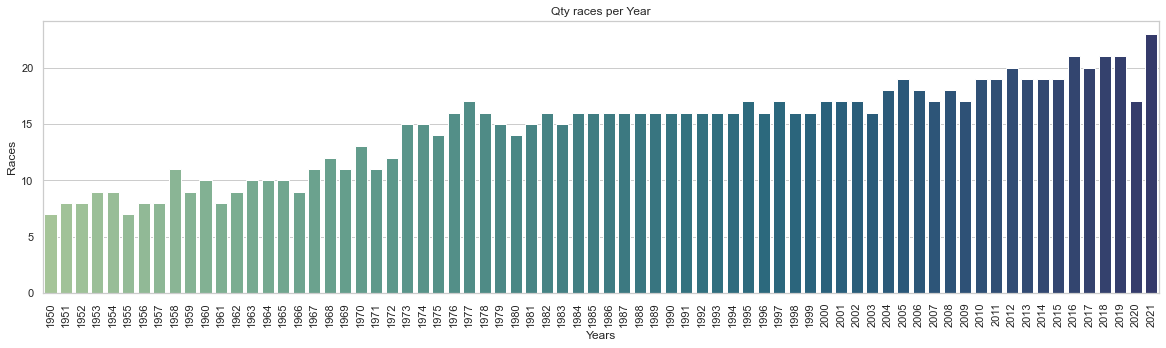

In [47]:
sns.set_theme(style='whitegrid')
fig, axis = plt.subplots(1,1, figsize=(20, 5), sharex=True)

df_races_plot = df_races_cl['year'].value_counts().reset_index()
df_races_plot.columns = ['Year', 'Races']
df_races_plot.rename(columns={'Year' : 'Races'})
df_races_plot.sort_values(by=['Year'], inplace=True)
df_races_plot.sort_values(by=['Year'])

graph = sns.barplot(x=df_races_plot['Year'], y=df_races_plot['Races'], palette="crest")
graph.set(title='Qty races per Year', xlabel='Years', ylabel='Races')
graph.set_xticklabels(labels=graph.get_xticklabels(), rotation=90)

max = df_races_plot.describe() * 1.1
max_y = 0

_, max_y_f = graph.get_ylim()
max_y = max_y_f if max_y_f > max_y else max_y
graph.set(ylim=(0, max_y))

fig.show()
df_races_plot.transpose()

### Total points per season

In [30]:
# Changing positions of rank value from float to int

float_to_int = lambda value: int(value)

test_values = [10.0, 55.0, 2.0, 6.0]
values_int = list(map(float_to_int, test_values))

print(test_values)
print(values_int)

[10.0, 55.0, 2.0, 6.0]
[10, 55, 2, 6]


In [31]:
df_results_cl.dtypes

raceId             int64
driverId           int64
constructorId      int64
position         float64
dtype: object

In [32]:
df_results_cl['position'] = df_results_cl['position'].apply(float_to_int)

In [33]:
df_results_cl.dtypes

raceId           int64
driverId         int64
constructorId    int64
position         int64
dtype: object

In [35]:
# Adding column with amount of points

points = [1, 25, 18, 15, 12, 10, 8, 6, 4, 2, 1]
df_results_cl['points'] = 0
df_results_cl['year'] = 0

for index, result in df_results_cl.iterrows():
    result['points'] = points[result['position']]

for index, result in df_results_cl.iterrows():
    
    raceId = int(result['raceId'])
    year = int(df_races_cl[df_races_cl['raceId'] == raceId]['year'])
    result['year'] = year
        
df_results_cl.head(10)

raceId  driverId  constructorId  position  points  year
0       18         1              1         1      25  2008
1       18         2              2         2      18  2008
2       18         3              3         3      15  2008
3       18         4              4         4      12  2008
4       18         5              1         5      10  2008
5       18         6              3         6       8  2008
6       18         7              5         7       6  2008
7       18         8              6         8       4  2008
22      19         8              6         1      25  2008
23      19         9              2         2      18  2008

In [42]:
# Creating the dataset of pilots x years x points that will be used in the next charts

def ColumnToList(dataframe, array):
    for n in dataframe.sort_values():
        if n not in array:
            array.append(n)         
years = []
ColumnToList(df_races_cl['year'], years)

df_drivers_years_points = df_results_cl.filter(['driverId','constructorId','points','year'], axis=1)
points_drivers_array = []
points_teams_array=[]

for year in years:
    
    points_year = df_drivers_years_points[df_drivers_years_points['year'] == year]
    for index, driver in df_drivers_cl.iterrows():
        
        array = []
        driver_name = f'''{driver['forename']} {driver['surname']}'''
        array.extend([driver_name, driver['code']])
        array.append(year)
        array.append(points_year[points_year['driverId'] == driver['driverId']].sum()['points'])
        points_drivers_array.append(array)
    
    for index, team in df_teams_cl.iterrows():
        
        array = []
        array.extend([team['name'], year])
        array.append(points_year[points_year['constructorId'] == team['constructorId']].sum()['points'])
        points_teams_array.append(array)

df_drivers_points = pd.DataFrame(points_drivers_array, columns=('name','code','year','points'))
df_teams_points = pd.DataFrame(points_teams_array, columns=('name','year','points'))

In [43]:
# Visualizing the pilot dataframe
# Changing 1992 value to desired year

view_drivers = df_drivers_points[df_drivers_points['year'] == 1992]
view_drivers = view_drivers[view_drivers['points'] > 0]
view_drivers[view_drivers['year'] == 1992].sort_values(by=['points'], ascending=False)

name code  year  points
35920         Nigel Mansell  NaN  1992     279
35855    Michael Schumacher  MSC  1992     181
35944      Riccardo Patrese  NaN  1992     177
35902        Gerhard Berger  NaN  1992     157
35927          Ayrton Senna  NaN  1992     150
35909        Martin Brundle  NaN  1992     146
35930      Michele Alboreto  NaN  1992      75
35880            Jean Alesi  NaN  1992      74
35882         Mika Häkkinen  NaN  1992      67
35935     Andrea de Cesaris  NaN  1992      50
35925            Érik Comas  NaN  1992      41
35919     Pierluigi Martini  NaN  1992      26
35934      Jyrki Järvilehto  NaN  1992      23
35948       Thierry Boutsen  NaN  1992      23
35913          Aguri Suzuki  NaN  1992      22
35890        Johnny Herbert  NaN  1992      22
35947          Ivan Capelli  NaN  1992      21
35916       Karl Wendlinger  NaN  1992      17
35929  Christian Fittipaldi  NaN  1992      14
35956        Stefano Modena  NaN  1992      14
35906     Gianni Morbidelli  NaN  1992      11
35917       Bertrand Gachot  NaN  1992       8
35952     Maurício Gugelmin  NaN  1992       7
35904         Ukyo Katayama  NaN  1992       4
35954    Olivier Grouillard  NaN  1992       4
35933         Paul Belmondo  NaN  1992       2
35953     Eric van de Poele  NaN  1992       1

In [44]:
# Visualizing the teams dataframe
# Changing 1992 value to desired year

view_teams = df_teams_points[df_teams_points['year'] == 1992]
view_teams = view_teams[view_teams['points'] > 0]
view_teams[view_teams['year'] == 1992].sort_values(by=['points'], ascending=False)

name  year  points
8864    Williams  1992     456
8883    Benetton  1992     327
8862     McLaren  1992     307
8890    Footwork  1992      97
8867     Ferrari  1992      95
8893  Team Lotus  1992      89
8888      Ligier  1992      64
8886     Tyrrell  1992      54
8896     Dallara  1992      49
8879     Minardi  1992      25
8878      Jordan  1992      21
8898       March  1992      19
8894   Larrousse  1992      12
8897   Fondmetal  1992       1

<ipython-input-45-281fcac761c3>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  view.show()


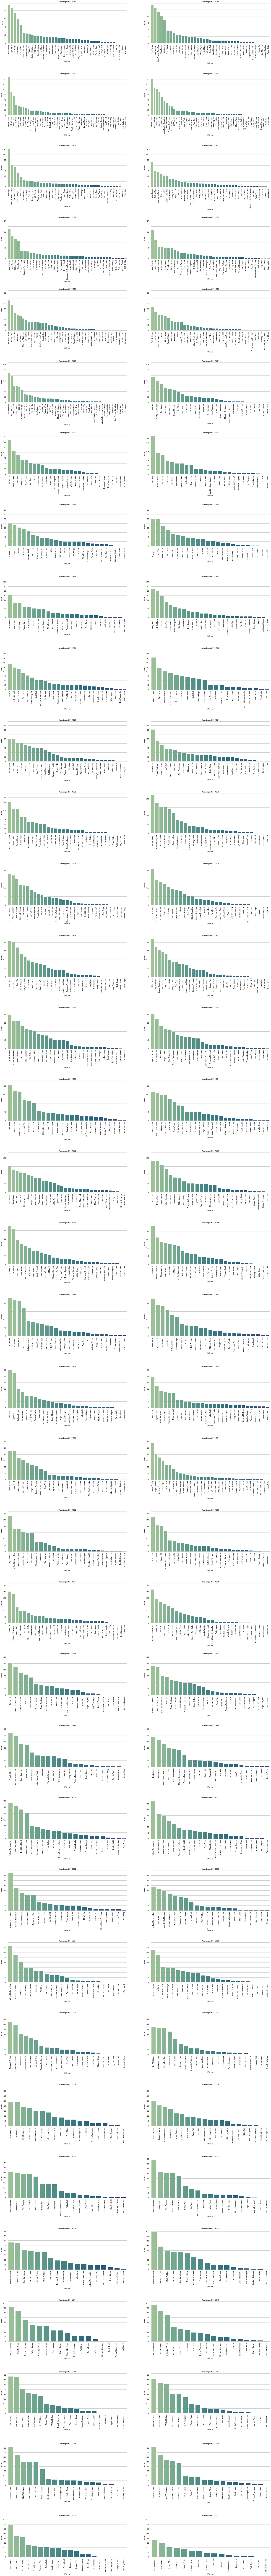

In [45]:
# Creating the Graphs - drivers vs points

sns.set_theme(style='whitegrid')

axis = 0
max_y = 0
columns = 2
rows = int(len(years) / columns)
view, axes = plt.subplots(rows,columns, figsize=(30, 300), sharex=False)
plt.subplots_adjust(hspace = 0.8)
axes = axes.flatten()

for year in years:
    
    plot = df_drivers_points[df_drivers_points['year'] == year]
    plot = plot[plot['points'] > 0].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Standings of F1 {year}', xlabel='Drivers', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))

    
view.show()

<ipython-input-49-cde05cdfd66a>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  view.show()


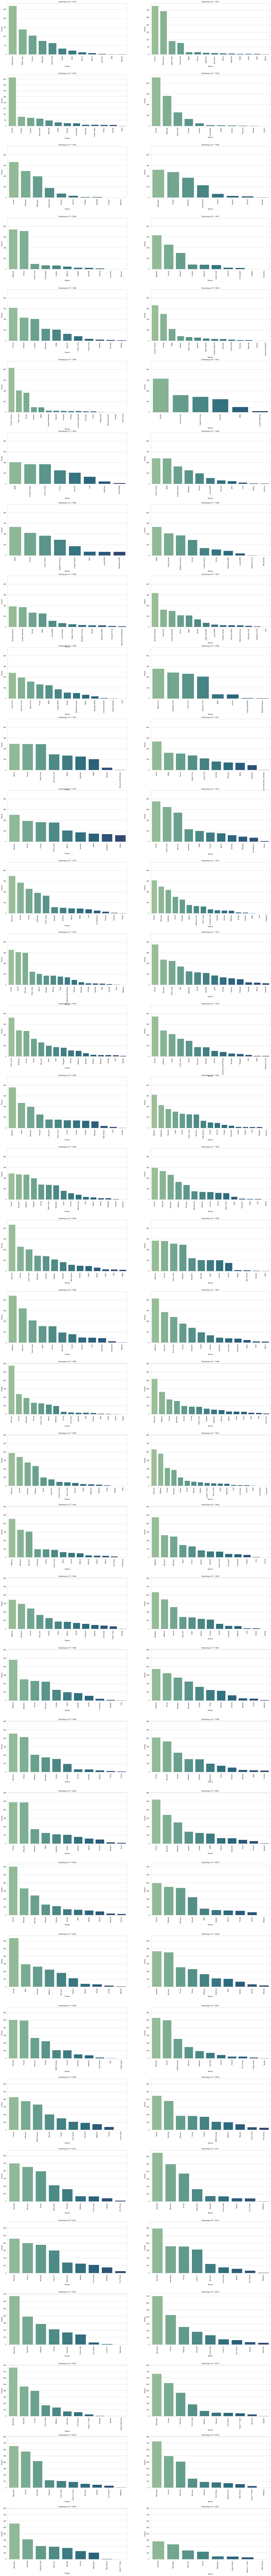

In [49]:
# Creating the Graphs - teams vs points

sns.set_theme(style='whitegrid')

axis = 0
max_y = 0
columns = 2
rows = int(len(years) / columns)
view, axes = plt.subplots(rows,columns, figsize=(30, 300), sharex=False)
plt.subplots_adjust(hspace = 0.4)
axes = axes.flatten()

for year in years:
    
    plot = df_teams_points[df_teams_points['year'] == year]
    plot = plot[plot['points'] > 0].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Standings of F1 {year}', xlabel='Teams', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))

    
view.show()

### Total points

In [50]:
# Preparing the dataframes 

teams_list = []
drivers_list = []

ColumnToList(df_teams_points['name'], teams_list)
ColumnToList(df_drivers_points['name'], drivers_list)

def TotalPoints(dataframe, column_name, list):
    array_df = []
    for n in list:
        
        array = []
        array.extend([n, dataframe[dataframe[column_name] == n].sum()['points']])
        array_df.append(array)
        
    return pd.DataFrame(array_df, columns=('name', 'points'))

df_total_teams_points = TotalPoints(df_teams_points, 'name', teams_list)
df_total_drivers_points = TotalPoints(df_drivers_points, 'name', drivers_list)

<ipython-input-51-806bf3ad7163>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  view.show()


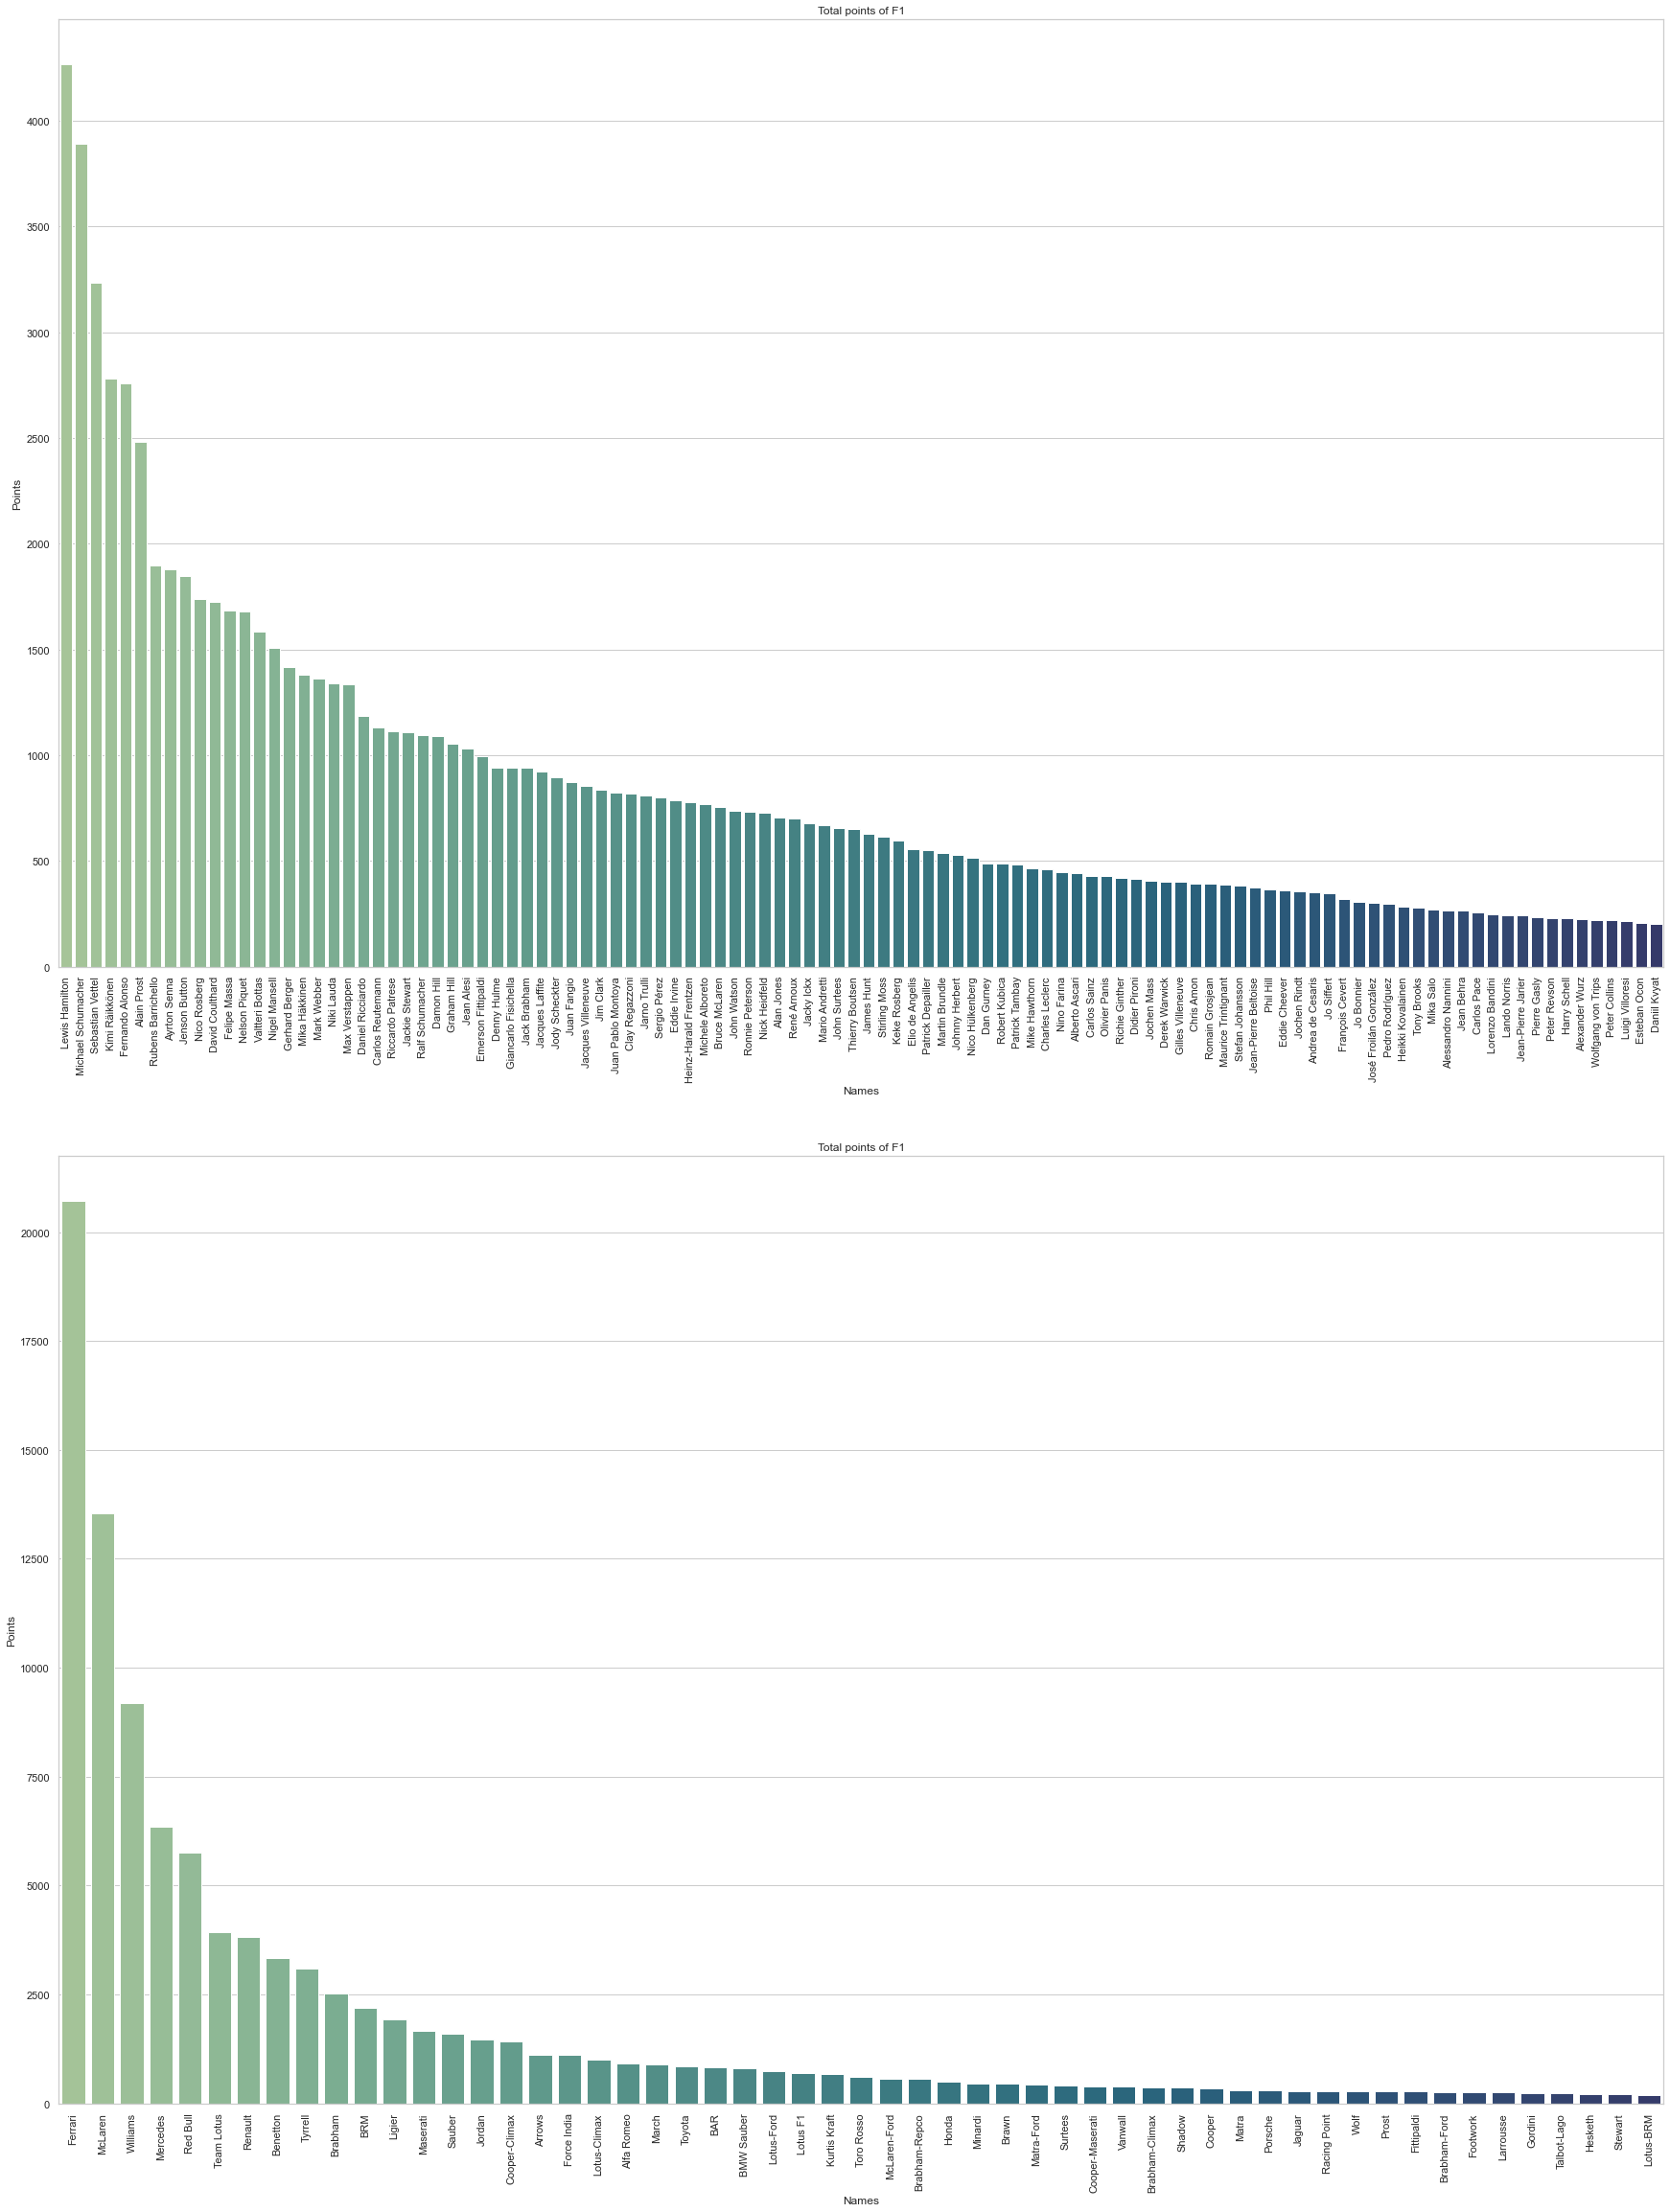

In [51]:
# Creating the Graphs - names of the drivers vs points and names of the teams vs points

dataframes = [df_total_drivers_points, df_total_teams_points]
sns.set_theme(style='whitegrid')

axis = 0
max_y = 0
view, axes = plt.subplots(2,1, figsize=(30, 40), sharex=False)
plt.subplots_adjust(hspace = 0.2)
axes = axes.flatten()

for df in dataframes:
    
    plot = df[df['points'] > 200].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Total points of F1', xlabel='Names', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))

    
view.show()

### Conclusion -
#### The driver with most points is Lewis Hamilton ( Team: Mercedes) and the team with most points is Ferrari.